# UAE Real Estate Prediction

## About this project: <a class="anchor" id="About this project"></a>
The primary objective of this project is to develop a linear regression model to accurately predict the prices of residential units in the United Arab Emirates.

Specific Objectives:

* Data Cleaning and Exploration: Identify and clean relevant information for analysis.
* Graphical Analysis: Conduct precise and concise graphical analyses.
* Correlation Identification: Determine the elements with the highest correlation to property prices.
* Linear Regression Modeling: Develop a linear regression model and evaluate its effectiveness.

## About the Dataset: <a class="anchor" id="Data"></a>
The dataset offers a detailed overview of property listings for sale across the United Arab Emirates, encompassing major cities like Dubai, Abu Dhabi, and Al Ain. Sourced from Bayut.com, it serves as a vital resource for various professionals, including Data Scientists, Real Estate Analysts, Urban Planners, and Developers, interested in exploring market dynamics, price trends, and development patterns in the UAE.

Key Features:

* Price: Listing price of the property in AED.
* Type: Specifies the property type (e.g., Apartment, Townhouse).
* Beds: Number of bedrooms, with '0' indicating a studio flat.
* Baths: Number of bathrooms.
* Address: Full address providing precise location insights.
* Furnishing: Indicates if the property is furnished or unfurnished.
* Completion Status: Current status of the property (Ready, Off-Plan).
* Building Name, Area Name, City: Provide contextual location details.
* Year of Completion: Year when the property was or is expected to be completed.
* Total Floors, Parking Spaces, Building Area: Key building features.
* Latitude, Longitude: Geographic coordinates for refined location analysis.
* Purpose: Intended purpose of the listing, consistently noted as 'For Sale'.




## Acknowledgement: <a class="anchor" id="Data"></a>
Acknowledgments go to Azhar Saleem for providing the dataset sourced from Bayut.com, the largest real estate classifieds website in the UAE. The dataset spans from December 31, 2023, to May 1, 2024. (Source: https://www.kaggle.com/datasets/azharsaleem/dubai-real-estate-sales-insights/data)

## Loading the Data
This section entails importing the dataset from a CSV file using the Pandas library. The necessary libraries will be imported, and the first 5 rows of the dataset will be visualized.


In [972]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing

In [973]:
UAE_RealEstate = pd.read_csv("bayut_selling_properties.csv")
UAE_RealEstate.head()


,price,price_category,type,beds,baths,address,furnishing,completion_status,post_date,average_rent,...,total_parking_spaces,total_floors,total_building_area_sqft,elevators,area_name,city,country,Latitude,Longitude,purpose
0,1450000,Medium,Apartment,1,2,"The Bay, Business Bay, Dubai",Furnished,Ready,2024-04-15,0,...,0,0,0,0,Business Bay,Dubai,UAE,25.189427,55.264819,For Sale
1,6600000,High,Townhouse,5,5,"Brookfield, DAMAC Hills, Dubai",Unfurnished,Ready,2024-04-15,0,...,0,0,0,0,DAMAC Hills,Dubai,UAE,25.028148,55.264246,For Sale
2,4825000,High,Apartment,2,3,"Vida Residence Downtown, Downtown Dubai, Dubai",Unfurnished,Ready,2024-04-18,288929,...,510,56,1,11,Downtown Dubai,Dubai,UAE,25.186684,55.274705,For Sale
3,980000,Average,Apartment,3,3,"Building 39, Al Reef Downtown, Al Reef, Abu Dhabi",Unfurnished,Ready,2024-01-03,73384,...,0,0,0,0,Al Reef,Abu Dhabi,UAE,24.466437,54.656891,For Sale
4,2499999,Medium,Townhouse,3,4,"Nima, The Valley, Dubai",Furnished,Off-Plan,2024-02-28,0,...,0,0,0,0,The Valley,Dubai,UAE,25.019221,55.447201,For Sale


## Data Information


The dataset contains 41,381 entries with 22 columns. Key features include property price, type, number of bedrooms and bathrooms, location details, furnishing status, completion status, and building specifications. The dataset shows no missing values except for latitude and longitude, and it comprises a variety of data types including integers, floats, and objects.

In [974]:
UAE_RealEstate.shape

(41381, 22)

In [975]:
UAE_RealEstate.columns

Index(['price', 'price_category', 'type', 'beds', 'baths', 'address',
       'furnishing', 'completion_status', 'post_date', 'average_rent',
       'building_name', 'year_of_completion', 'total_parking_spaces',
       'total_floors', 'total_building_area_sqft', 'elevators', 'area_name',
       'city', 'country', 'Latitude', 'Longitude', 'purpose'],
      dtype='object')

In [976]:
UAE_RealEstate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41381 entries, 0 to 41380
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     41381 non-null  int64  
 1   price_category            41381 non-null  object 
 2   type                      41381 non-null  object 
 3   beds                      41381 non-null  int64  
 4   baths                     41381 non-null  int64  
 5   address                   41381 non-null  object 
 6   furnishing                41381 non-null  object 
 7   completion_status         41381 non-null  object 
 8   post_date                 41381 non-null  object 
 9   average_rent              41381 non-null  int64  
 10  building_name             41381 non-null  object 
 11  year_of_completion        41381 non-null  int64  
 12  total_parking_spaces      41381 non-null  int64  
 13  total_floors              41381 non-null  int64  
 14  total_

In [977]:
print(UAE_RealEstate.describe())

              price          beds         baths  average_rent  \
count  4.138100e+04  41381.000000  41381.000000  4.138100e+04   
mean   3.788624e+06      2.190957      3.007540  9.292880e+04   
std    8.482870e+06      1.567855      1.785553  2.503703e+05   
min    0.000000e+00      0.000000      0.000000  0.000000e+00   
25%    1.100000e+06      1.000000      2.000000  0.000000e+00   
50%    2.000000e+06      2.000000      3.000000  0.000000e+00   
75%    3.600000e+06      3.000000      4.000000  1.243790e+05   
max    4.825000e+08     11.000000     11.000000  2.807952e+07   

       year_of_completion  total_parking_spaces  total_floors  \
count        41381.000000          41381.000000  41381.000000   
mean           681.112491            172.559073     13.212126   
std            953.886883            353.899074     20.298365   
min              0.000000              0.000000      0.000000   
25%              0.000000              0.000000      0.000000   
50%              0.00000

## Data Cleaning

In this section, I identified minimal null values, indicating robust data quality. Additionally, we performed an analysis of cells containing zero, deemed inconsistent data, particularly in columns such as bedrooms, bathrooms, and number of floors. Outliers were identified through boxplots, revealing outliers in area and price.

In [978]:
#Dropping columns that are not part of the analysis
# List of columns to drop
columns_to_drop = ['address', 'average_rent', 'building_name' , 'area_name', 'country', 'purpose','post_date','average_rent','year_of_completion']
# Drop the columns
UAE_RealEstate = UAE_RealEstate.drop(columns=columns_to_drop)

# Drop rows with null values in any column
UAE_RealEstate = UAE_RealEstate.dropna()

print(UAE_RealEstate.head())

     price price_category       type  beds  baths   furnishing  \
0  1450000         Medium  Apartment     1      2    Furnished   
1  6600000           High  Townhouse     5      5  Unfurnished   
2  4825000           High  Apartment     2      3  Unfurnished   
3   980000        Average  Apartment     3      3  Unfurnished   
4  2499999         Medium  Townhouse     3      4    Furnished   

  completion_status  total_parking_spaces  total_floors  \
0             Ready                     0             0   
1             Ready                     0             0   
2             Ready                   510            56   
3             Ready                     0             0   
4          Off-Plan                     0             0   

   total_building_area_sqft  elevators       city   Latitude  Longitude  
0                         0          0      Dubai  25.189427  55.264819  
1                         0          0      Dubai  25.028148  55.264246  
2                         

In [979]:
# see what columns have missing data
UAE_RealEstate.isnull().sum().sort_values(ascending=False)

price                       0
price_category              0
type                        0
beds                        0
baths                       0
furnishing                  0
completion_status           0
total_parking_spaces        0
total_floors                0
total_building_area_sqft    0
elevators                   0
city                        0
Latitude                    0
Longitude                   0
dtype: int64

In [980]:
# see are the missing value by Percentage
missing_percentage = UAE_RealEstate.isnull().sum().sort_values(ascending=False)/len(UAE_RealEstate)*100
missing_percentage

price                       0.0
price_category              0.0
type                        0.0
beds                        0.0
baths                       0.0
furnishing                  0.0
completion_status           0.0
total_parking_spaces        0.0
total_floors                0.0
total_building_area_sqft    0.0
elevators                   0.0
city                        0.0
Latitude                    0.0
Longitude                   0.0
dtype: float64

In [981]:
# see the duplicated rows
UAE_RealEstate.duplicated().sum()


7353

In [982]:
# Showing the Rows with Zeros
# Selecting the numeric Columns
numeric_columns = UAE_RealEstate.select_dtypes(include=['int64', 'float64'])

# Count Zeros in each column
zeros_count = (numeric_columns == 0).sum()


print("Counting zeros in each numeric column:\n",zeros_count)

Counting zeros in each numeric column:
 price                          16
beds                         4626
baths                         130
total_parking_spaces        28348
total_floors                23474
total_building_area_sqft    23591
elevators                   28271
Latitude                        0
Longitude                       0
dtype: int64


In [983]:
# Remove all rows containing zeros in the specified columns
UAE_RealEstate = UAE_RealEstate[(UAE_RealEstate[['baths', 'total_floors', 'total_building_area_sqft']] != 0).all(axis=1)]

# Show the new size of the DataFrame after removing rows
print(UAE_RealEstate.shape)
print(UAE_RealEstate.info())

(17772, 14)
<class 'pandas.core.frame.DataFrame'>
Index: 17772 entries, 2 to 41380
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     17772 non-null  int64  
 1   price_category            17772 non-null  object 
 2   type                      17772 non-null  object 
 3   beds                      17772 non-null  int64  
 4   baths                     17772 non-null  int64  
 5   furnishing                17772 non-null  object 
 6   completion_status         17772 non-null  object 
 7   total_parking_spaces      17772 non-null  int64  
 8   total_floors              17772 non-null  int64  
 9   total_building_area_sqft  17772 non-null  int64  
 10  elevators                 17772 non-null  int64  
 11  city                      17772 non-null  object 
 12  Latitude                  17772 non-null  float64
 13  Longitude                 17772 non-null  float64
dtyp

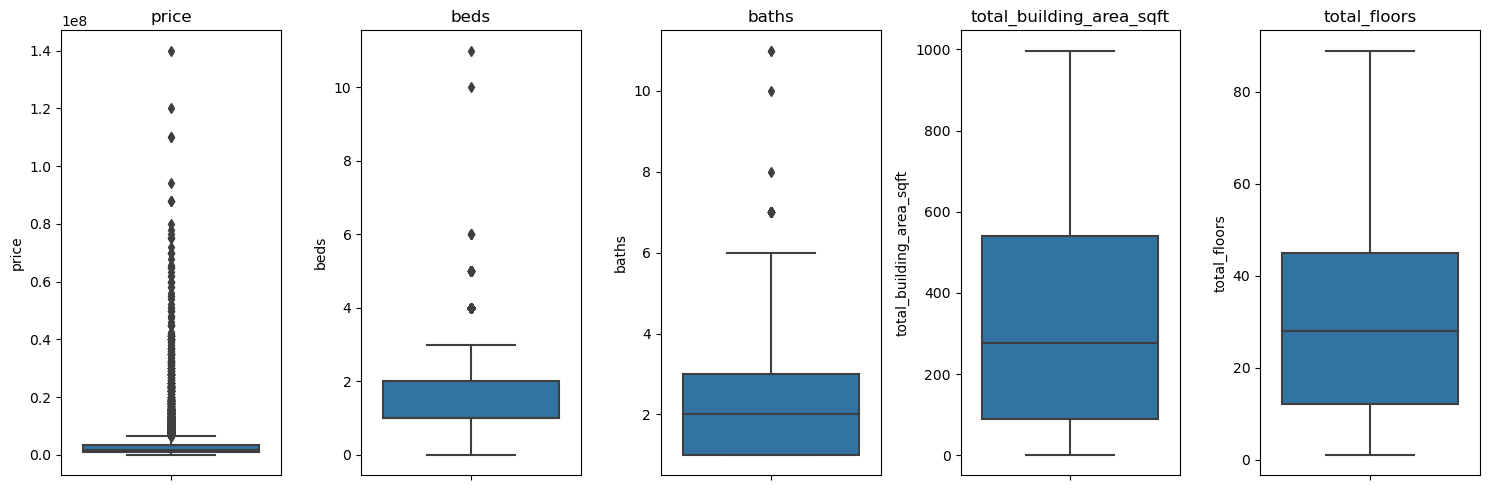

In [984]:
#Define Outliers
# Specify the columns you want to plot
columns_to_plot = ['price', 'beds', 'baths', 'total_building_area_sqft', 'total_floors']

# Create subplots for the boxplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(15, 5))

# Iterate over the columns and plot the boxplots
for i, col in enumerate(columns_to_plot):
    sns.boxplot(y=UAE_RealEstate[col], ax=axes[i])
    axes[i].set_title(col)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [985]:
#Apartments with an area less than 100 sqft are considered outliers. 
outliers_area = UAE_RealEstate[UAE_RealEstate['total_building_area_sqft'] < 40]

print(outliers_area)

         price price_category       type  beds  baths   furnishing  \
2      4825000           High  Apartment     2      3  Unfurnished   
11     3850000           High  Apartment     2      2  Unfurnished   
19     2190000         Medium  Apartment     1      1  Unfurnished   
21      619900        Average  Apartment     0      1    Furnished   
33      610000        Average  Apartment     0      1  Unfurnished   
...        ...            ...        ...   ...    ...          ...   
41325  2900000         Medium  Apartment     1      2  Unfurnished   
41331   950000        Average  Apartment     1      2  Unfurnished   
41345  3650000           High  Apartment     1      1  Unfurnished   
41368  2755000         Medium  Apartment     0      1    Furnished   
41373  1280000        Average  Apartment     1      1  Unfurnished   

      completion_status  total_parking_spaces  total_floors  \
2                 Ready                   510            56   
11             Off-Plan          

In [986]:
#Dropping Outliers
UAE_RealEstate = UAE_RealEstate.drop(outliers_area.index)
UAE_RealEstate.shape

(14083, 14)

In [987]:
#Apartments with a price less than 350.000 AED are considered outliers. 
outliers_price = UAE_RealEstate[UAE_RealEstate['price'] < 350000]

print(outliers_price)

        price price_category       type  beds  baths   furnishing  \
5112   325000        Average  Apartment     0      1  Unfurnished   
5684   315000        Average  Apartment     0      1  Unfurnished   
5927   279999        Average  Apartment     0      1    Furnished   
6170   330000        Average  Apartment     0      1  Unfurnished   
17327  320000        Average  Apartment     0      1  Unfurnished   
17704       0        Average  Apartment     2      3    Furnished   
17917  295000        Average  Apartment     0      1  Unfurnished   
18828  330000        Average  Apartment     0      1  Unfurnished   
19928  330000        Average  Apartment     0      1  Unfurnished   
19942  315000        Average  Apartment     0      1  Unfurnished   
20538  325000        Average  Apartment     0      1  Unfurnished   
21104  325000        Average  Apartment     0      1  Unfurnished   
21214  289999        Average  Apartment     0      1  Unfurnished   
22025       0        Average  Apar

In [988]:
#Dropping Outliers
UAE_RealEstate = UAE_RealEstate.drop(outliers_price.index)
UAE_RealEstate.shape

(14057, 14)

In [989]:
#Apartments with a price more than 30.000.000 AED are considered outliers. 
outliers_priceM = UAE_RealEstate[UAE_RealEstate['price'] > 7000000]

print(outliers_priceM)

          price price_category       type  beds  baths   furnishing  \
24     11000000           High  Apartment     4      4  Unfurnished   
90     13500000           High  Apartment     4      6  Unfurnished   
102    10500000           High  Apartment     4      5    Furnished   
110    88000000           High  Apartment     5      6  Unfurnished   
137     9500000           High  Apartment     2      2  Unfurnished   
...         ...            ...        ...   ...    ...          ...   
41293   9000000           High  Apartment     2      3  Unfurnished   
41326   7200000           High  Apartment     2      4  Unfurnished   
41350   7500000           High  Apartment     2      3  Unfurnished   
41365  13500000           High  Apartment     3      3  Unfurnished   
41376   7100000           High  Apartment     2      2  Unfurnished   

      completion_status  total_parking_spaces  total_floors  \
24             Off-Plan                   694            45   
90             Off-Pl

In [990]:
#Dropping Outliers
UAE_RealEstate = UAE_RealEstate.drop(outliers_priceM.index)


In [991]:
UAE_RealEstate.shape

(13441, 14)

In [992]:
UAE_RealEstate.head()

,price,price_category,type,beds,baths,furnishing,completion_status,total_parking_spaces,total_floors,total_building_area_sqft,elevators,city,Latitude,Longitude
5,1150000,Average,Apartment,0,1,Unfurnished,Ready,259,27,502,6,Dubai,25.189427,55.264819
6,2475000,Medium,Apartment,1,2,Unfurnished,Off-Plan,279,49,696,5,Dubai,25.078641,55.135252
7,1450000,Medium,Apartment,1,2,Unfurnished,Ready,0,75,810,0,Dubai,25.078641,55.135252
8,2400000,Medium,Apartment,1,2,Unfurnished,Ready,0,26,571,0,Dubai,25.189427,55.264819
12,2750000,Medium,Apartment,1,1,Furnished,Ready,138,9,298,2,Dubai,25.164759,55.218728


## Exploratory Analysis and Visualization¶

In this section, categorical variables are visualized using a pie chart, demonstrating that after the cleaning process, the presence of 'city' and 'status' becomes irrelevant. Additionally, a histogram of prices is plotted, revealing a trend where the availability of units for sale decreases as prices increase.

In [993]:
price_category_counts = UAE_RealEstate["price_category"].value_counts()
price_category_counts

price_category
Average    5786
Medium     5017
High       2638
Name: count, dtype: int64

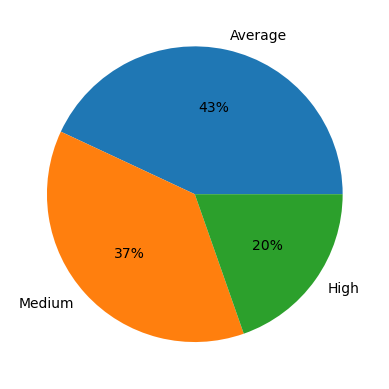

In [994]:
plt.pie(price_category_counts, labels=price_category_counts.index, autopct='%1.0f%%')
plt.show()

In [995]:
type_counts = UAE_RealEstate["type"].value_counts()
type_counts

type
Apartment               13298
Hotel Apartment           106
Penthouse                  35
Residential Building        2
Name: count, dtype: int64

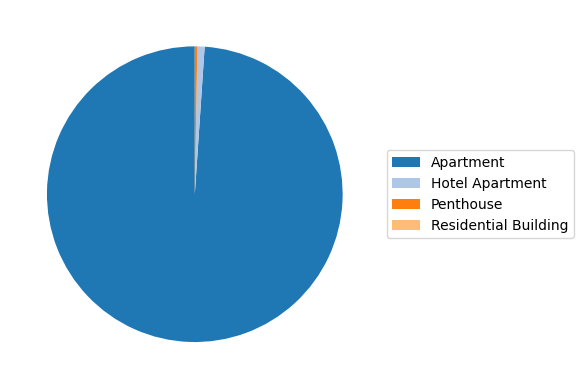

In [996]:
# Plot the pie chart with only colors
patches, texts = plt.pie(type_counts, colors=plt.cm.tab20.colors, startangle=90)

# Create a legend with labels
plt.legend(patches, type_counts.index, loc="center left", bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

In [997]:
furnishing_counts = UAE_RealEstate["furnishing"].value_counts()
furnishing_counts

furnishing
Unfurnished    8939
Furnished      4502
Name: count, dtype: int64

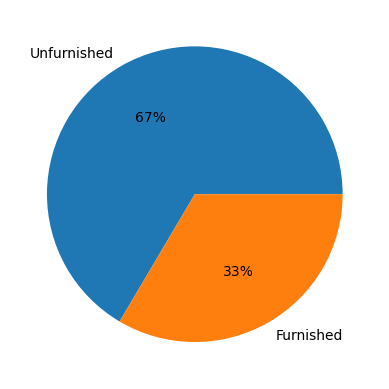

In [998]:
plt.pie(furnishing_counts, labels=furnishing_counts.index, autopct='%1.0f%%')
plt.show()

In [999]:
completion_status_counts = UAE_RealEstate["completion_status"].value_counts()
completion_status_counts

completion_status
Ready       11073
Off-Plan     2368
Name: count, dtype: int64

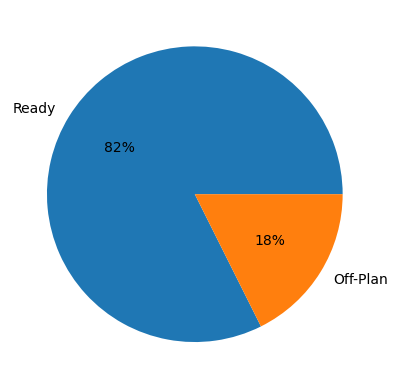

In [1000]:
plt.pie(completion_status_counts, labels=completion_status_counts.index, autopct='%1.0f%%')
plt.show()

In [1001]:
city_counts = UAE_RealEstate["city"].value_counts()
city_counts

city
Dubai    13441
Name: count, dtype: int64

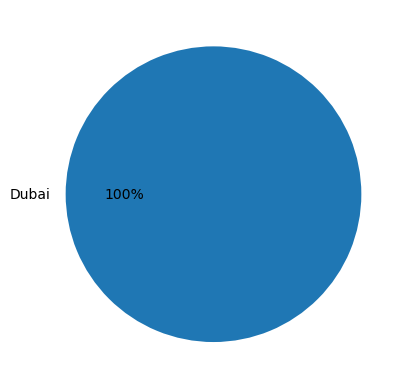

In [1002]:
plt.pie(city_counts, labels=city_counts.index, autopct='%1.0f%%')
plt.show()

In [1003]:
#Dropping Irrelevant Columns
UAE_RealEstate = UAE_RealEstate.drop(['city'], axis=1)

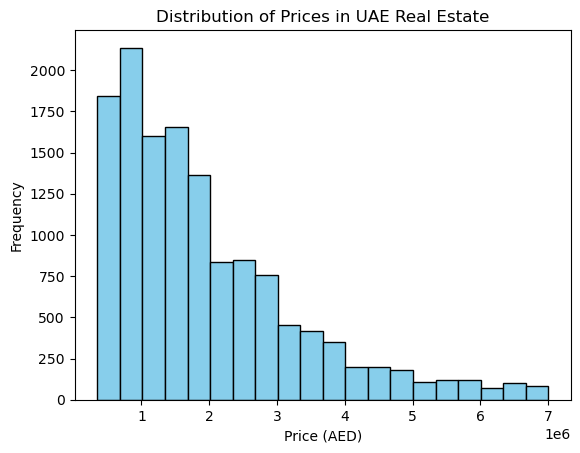

In [1004]:
# Create the histogram
plt.hist(UAE_RealEstate['price'], bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Price (AED)')
plt.ylabel('Frequency')
plt.title('Distribution of Prices in UAE Real Estate')

# Show the histogram
plt.show()

##  Feature Engineering

In this section, categorical variables are transformed into numerical variables using label encoding and mapping dictionaries, allowing for a categorical order. These techniques are applied to encode 'type', 'furnishing', 'completion status', and 'price category' variables.

In [1005]:
UAE_RealEstate.head()

,price,price_category,type,beds,baths,furnishing,completion_status,total_parking_spaces,total_floors,total_building_area_sqft,elevators,Latitude,Longitude
5,1150000,Average,Apartment,0,1,Unfurnished,Ready,259,27,502,6,25.189427,55.264819
6,2475000,Medium,Apartment,1,2,Unfurnished,Off-Plan,279,49,696,5,25.078641,55.135252
7,1450000,Medium,Apartment,1,2,Unfurnished,Ready,0,75,810,0,25.078641,55.135252
8,2400000,Medium,Apartment,1,2,Unfurnished,Ready,0,26,571,0,25.189427,55.264819
12,2750000,Medium,Apartment,1,1,Furnished,Ready,138,9,298,2,25.164759,55.218728


In [1006]:
# Define the mapping dictionary to assign manually the codes for type
type_mapping = {'Residential Building': 0, 'Residential Floor': 1,'Residential Plot': 2,'Hotel Apartment': 3,'Penthouse': 4,'Apartment': 5}
UAE_RealEstate = pd.concat([UAE_RealEstate, UAE_RealEstate['type'].map(type_mapping).rename('type_encoded')], axis=1)

# Define the mapping dictionary to assign manually the codes for price category
type_mapping = {'Low': 0, 'Average': 1,'Medium': 2,'High': 3}
UAE_RealEstate = pd.concat([UAE_RealEstate, UAE_RealEstate['price_category'].map(type_mapping).rename('price_cat_encoded')], axis=1)

#Dropping Type
UAE_RealEstate = UAE_RealEstate.drop(['type'], axis=1)
#Dropping Type
UAE_RealEstate = UAE_RealEstate.drop(['price_category'], axis=1)

In [1007]:
label_encoder = preprocessing.LabelEncoder()
UAE_RealEstate.loc[:,'furnishing']= label_encoder.fit_transform(UAE_RealEstate['furnishing'])
label_encoder = preprocessing.LabelEncoder()
UAE_RealEstate.loc[:,'completion_status']= label_encoder.fit_transform(UAE_RealEstate['completion_status'])

In [1008]:
UAE_RealEstate.head()

,price,beds,baths,furnishing,completion_status,total_parking_spaces,total_floors,total_building_area_sqft,elevators,Latitude,Longitude,type_encoded,price_cat_encoded
5,1150000,0,1,1,1,259,27,502,6,25.189427,55.264819,5,1
6,2475000,1,2,1,0,279,49,696,5,25.078641,55.135252,5,2
7,1450000,1,2,1,1,0,75,810,0,25.078641,55.135252,5,2
8,2400000,1,2,1,1,0,26,571,0,25.189427,55.264819,5,2
12,2750000,1,1,0,1,138,9,298,2,25.164759,55.218728,5,2


,price,beds,baths,furnishing,completion_status,total_parking_spaces,total_floors,total_building_area_sqft,elevators,Latitude,Longitude,type_encoded,price_cat_encoded
price,1.000000,0.674137,0.614954,0.037520,-0.057655,0.019234,0.270018,0.260173,0.092158,0.349799,-0.131255,0.008828,0.884021
beds,0.674137,1.000000,0.840803,0.142673,0.064224,-0.068376,0.167733,0.084487,-0.063569,0.096290,-0.093774,0.052500,0.641039
baths,0.614954,0.840803,1.000000,0.091449,0.092264,-0.108701,0.150357,0.050071,-0.071310,0.051266,-0.133875,0.038614,0.570229
furnishing,0.037520,0.142673,0.091449,1.000000,-0.138676,-0.070235,-0.063309,-0.019217,-0.054245,-0.000776,0.067615,0.087030,0.048900
completion_status,-0.057655,0.064224,0.092264,-0.138676,1.000000,-0.186007,-0.084367,-0.281238,-0.273295,-0.133529,-0.081505,-0.028516,-0.073238
total_parking_spaces,0.019234,-0.068376,-0.108701,-0.070235,-0.186007,1.000000,0.220959,0.399826,0.591183,0.108828,0.226565,-0.024824,0.017899
total_floors,0.270018,0.167733,0.150357,-0.063309,-0.084367,0.220959,1.000000,0.695741,0.183325,0.172506,-0.187268,-0.033417,0.295471
total_building_area_sqft,0.260173,0.084487,0.050071,-0.019217,-0.281238,0.399826,0.695741,1.000000,0.456112,0.235009,-0.028840,-0.005340,0.274749
elevators,0.092158,-0.063569,-0.071310,-0.054245,-0.273295,0.591183,0.183325,0.456112,1.000000,0.173093,0.142401,-0.059891,0.096193
Latitude,0.349799,0.096290,0.051266,-0.000776,-0.133529,0.108828,0.172506,0.235009,0.173093,1.000000,0.559912,0.012987,0.395763


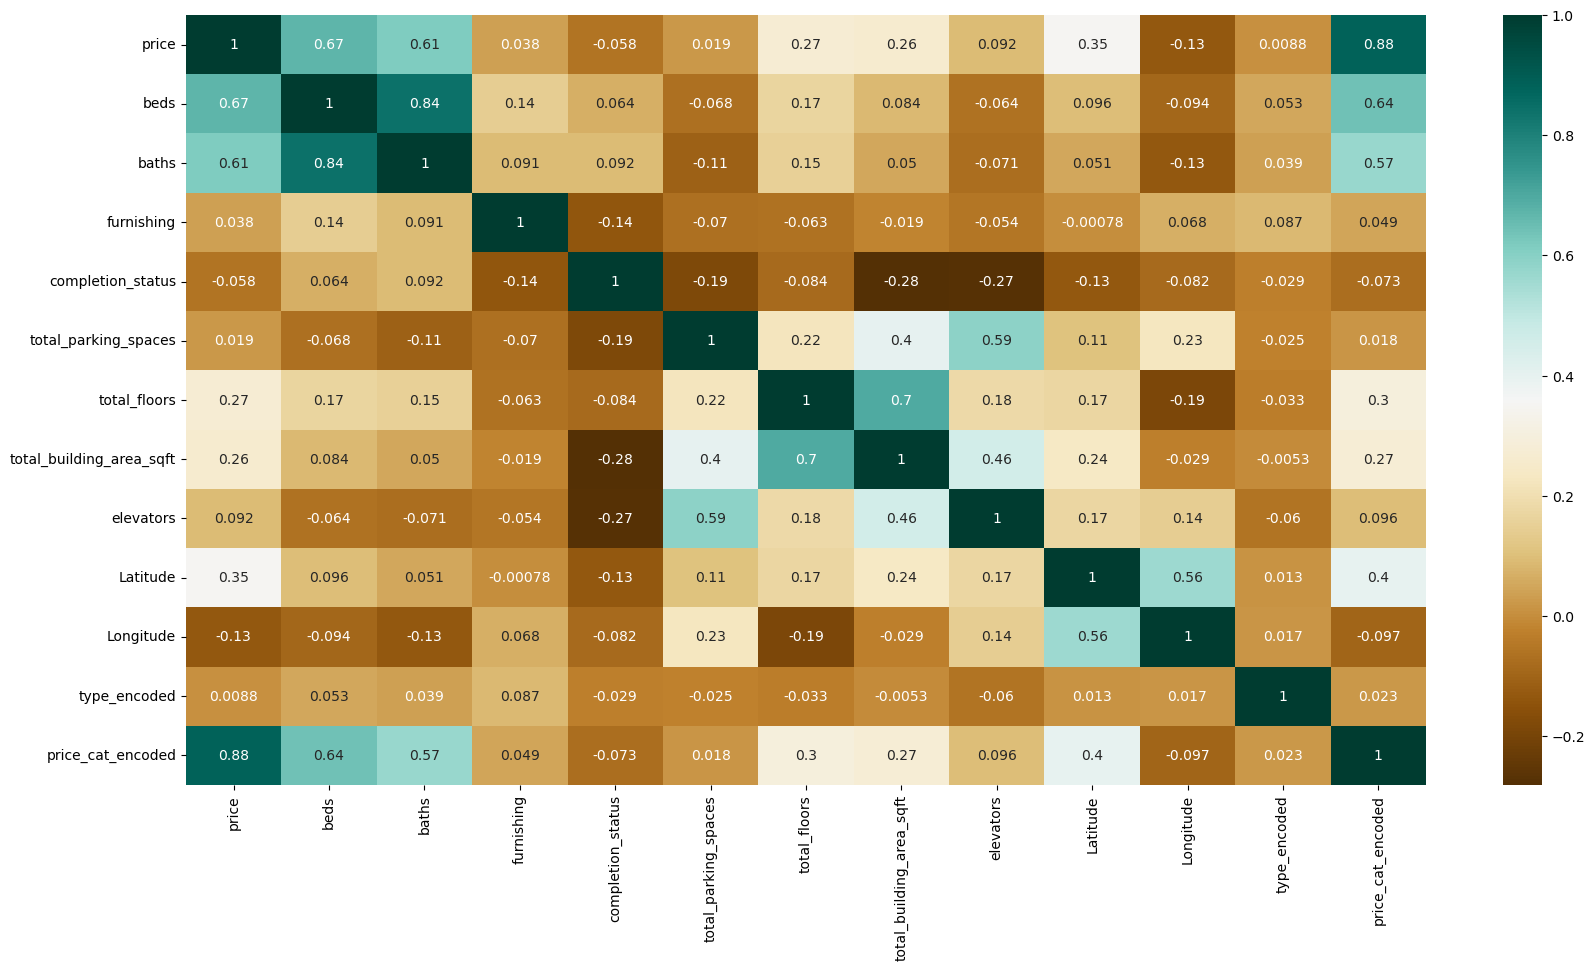

In [1009]:
#Creating a Heatmap
plt.figure(figsize=(20,10))
c= UAE_RealEstate.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

## Regression Model

In this section, the correlation between the columns and the price is analyzed. Features with higher correlations are selected for the model. The regression is performed using the LinearRegression model from scikit-learn. The coefficient of determination (𝑅2) is calculated to evaluate the model's performance. Additionally, the coefficients and intercept of the model are displayed.

In [1010]:
UAE_RealEstate.corr()['price']

price                       1.000000
beds                        0.674137
baths                       0.614954
furnishing                  0.037520
completion_status          -0.057655
total_parking_spaces        0.019234
total_floors                0.270018
total_building_area_sqft    0.260173
elevators                   0.092158
Latitude                    0.349799
Longitude                  -0.131255
type_encoded                0.008828
price_cat_encoded           0.884021
Name: price, dtype: float64

In [1011]:
data_linear = UAE_RealEstate.drop(['total_parking_spaces','furnishing','elevators'], axis=1)
data_linear.head(5)

,price,beds,baths,completion_status,total_floors,total_building_area_sqft,Latitude,Longitude,type_encoded,price_cat_encoded
5,1150000,0,1,1,27,502,25.189427,55.264819,5,1
6,2475000,1,2,0,49,696,25.078641,55.135252,5,2
7,1450000,1,2,1,75,810,25.078641,55.135252,5,2
8,2400000,1,2,1,26,571,25.189427,55.264819,5,2
12,2750000,1,1,1,9,298,25.164759,55.218728,5,2


In [1012]:
X = data_linear[['beds', 'baths', 'total_building_area_sqft', 'type_encoded','completion_status','total_floors','Latitude','price_cat_encoded','Longitude']]
y = data_linear['price']

In [1013]:
from sklearn import linear_model

In [1014]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [1015]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
y_pred = regr.predict(X)

mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R^2) Score: {r2:.2f}")

Mean Absolute Error (MAE): 401806.88
Mean Squared Error (MSE): 350957855722.50
Root Mean Squared Error (RMSE): 592416.96
R-squared (R^2) Score: 0.81


In [1017]:
print(regr.coef_)

[ 2.23967998e+05  1.27345494e+05  3.28891743e+02 -1.37408519e+05
 -2.45093649e+04 -4.46538933e+03  2.51394895e+06  1.23005466e+06
 -2.24529154e+06]


In [1018]:
print(regr.intercept_)

60783693.27710455


In [1016]:
UAE_RealEstate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13441 entries, 5 to 41380
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     13441 non-null  int64  
 1   beds                      13441 non-null  int64  
 2   baths                     13441 non-null  int64  
 3   furnishing                13441 non-null  object 
 4   completion_status         13441 non-null  object 
 5   total_parking_spaces      13441 non-null  int64  
 6   total_floors              13441 non-null  int64  
 7   total_building_area_sqft  13441 non-null  int64  
 8   elevators                 13441 non-null  int64  
 9   Latitude                  13441 non-null  float64
 10  Longitude                 13441 non-null  float64
 11  type_encoded              13441 non-null  int64  
 12  price_cat_encoded         13441 non-null  int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 1.4+ MB


In [1019]:
UAE_RealEstate.shape

(13441, 13)

## Summary and Insights

1. The dataset initially consisted of 41,381 rows and 22 columns, which were reduced to 13,441 rows and 13 columns after cleaning. Despite having a considerable number of entries, various inconsistencies were identified, such as a significant number of zero values in important columns like 'Baths' or 'Total Building Area'.

2. The majority of units listed as 'Off Plan' in the completion status had a value of 0 in the year of completion, leading to the decision to exclude this data from the analysis. After cleaning, only Dubai remained in the analysis, highlighting inconsistencies in data collection from other cities.

3. The final model has the following limitations:

* It is functional for units with a minimum area of 40 sqft.
* It is functional for units with prices between 350,000 AED and 7,000,000 AED. Higher prices were the outliers that most affected the model's performance.

4. The final equation is expressed as follows:
Price = 60783693.28 + 223968.00 (beds)+ 127345.49 (baths) + 328.89 (building_area_sqft) - 137408.52 (Type_encoded) - 24509.36 (completion Status) - 4465.39 (Total Floors)  + 1230054.66Price Cat Encoded - 2245291.54 (Longitude) + 2513948.95 (Latitude)